In [1]:
!nvidia-smi

Wed May  6 11:48:26 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

### jieba库使用简介
cut 返回的是一个生成器，lcut 返回一个列表

In [0]:
import jieba

In [3]:
text = '我本科毕业于电子科技大学，现在已被保送电子科技大学硕士研究生'
print(text)

我本科毕业于电子科技大学，现在已被保送电子科技大学硕士研究生


In [4]:
word_list = jieba.cut(text)
print(list(word_list))

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.741 seconds.
Prefix dict has been built successfully.


['我', '本科毕业', '于', '电子科技', '大学', '，', '现在', '已', '被', '保送', '电子科技', '大学', '硕士', '研究生']


In [5]:
word_list = jieba.cut(text, cut_all=False)
print("精准模式分词结果为:" + "/".join(word_list))

精准模式分词结果为:我/本科毕业/于/电子科技/大学/，/现在/已/被/保送/电子科技/大学/硕士/研究生


In [6]:
word_list = jieba.cut(text, cut_all=True)
print("全模式分词结果为:" + "/".join(word_list))

全模式分词结果为:我/本科/本科毕业/毕业/于/电子/电子科/电子科技/科技/大学/，/现在/已/被/保送/送电/电子/电子科/电子科技/科技/大学/硕士/研究/研究生


In [7]:
word_list = jieba.lcut(text)
print(word_list)

['我', '本科毕业', '于', '电子科技', '大学', '，', '现在', '已', '被', '保送', '电子科技', '大学', '硕士', '研究生']


In [8]:
word_list = jieba.lcut_for_search(text)
print(word_list)

['我', '本科', '毕业', '本科毕业', '于', '电子', '科技', '电子科', '电子科技', '大学', '，', '现在', '已', '被', '保送', '电子', '科技', '电子科', '电子科技', '大学', '硕士', '研究', '研究生']


In [0]:
with open('mydict.txt', 'w') as file:
    file.write('电子科技大学\n本科毕业')

In [10]:
jieba.load_userdict('mydict.txt')

word_list = jieba.lcut(text)
print(word_list)

['我', '本科毕业', '于', '电子科技大学', '，', '现在', '已', '被', '保送', '电子科技大学', '硕士', '研究生']


In [11]:
import tensorflow as tf


tf.__version__

'2.2.0-rc4'

In [12]:
imdb = tf.keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data()

17465344/17464789 [==============================] - 0s 0us/step


In [13]:
print('Training entries:{}, labels:{}'.format(len(train_data), len(train_labels)))

Training entries:25000, labels:25000


In [0]:
import os
import tarfile
import urllib.request
import tensorflow as tf
import numpy as np
import string
import re
from random import randint

In [0]:
np.set_printoptions(suppress=True)

In [0]:
url = 'http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz'
filepath = 'data/aclImdb_v1.tar.gz'

In [17]:
filedir = './data'

if not os.path.exists(filedir):
    os.makedirs(filedir)

if not os.path.isfile(filepath):
    print('downloading')
    result = urllib.request.urlretrieve(url, filepath)
    print('downloaded:', result)
else:
    print(filepath, 'is existed!')

if not os.path.exists('data/aclImdb'):
    tfile = tarfile.open(filepath, "r:gz")
    print('extracting...')
    result = tfile.extractall('data/')
    print('extraction completed')
else:
    print('data/aclImdb is existed!')

downloading
downloaded: ('data/aclImdb_v1.tar.gz', <http.client.HTTPMessage object at 0x7ff20ab894a8>)
extracting...
extraction completed


In [18]:
!wget https://storage.googleapis.com/tensorflow/tf-keras-datasets/imdb.npz

--2020-05-06 11:49:03--  https://storage.googleapis.com/tensorflow/tf-keras-datasets/imdb.npz
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.126.128, 2a00:1450:4013:c05::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.126.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17464789 (17M) [application/octet-stream]
Saving to: ‘imdb.npz’

imdb.npz            100%[===================>]  16.66M  --.-KB/s    in 0.06s   

2020-05-06 11:49:04 (279 MB/s) - ‘imdb.npz’ saved [17464789/17464789]



In [0]:
def read_files(filetype):
    path = './data/aclImdb/'
    file_list = []

    positive_path = path + filetype + "/pos/"
    for f in os.listdir(positive_path):
        file_list += [positive_path + f]
    pos_files_num = len(file_list)

    negative_path = path + filetype + '/neg/'
    for f in os.listdir(negative_path):
        file_list += [negative_path + f]
    neg_files_num = len(file_list) - pos_files_num

    print('read', filetype, 'files:', len(file_list))
    print(pos_files_num, 'pos files in', filetype, 'files')
    print(neg_files_num, 'neg files in', filetype, 'files')

    all_labels = ([[1, 0]] * pos_files_num + [[0, 1]] * neg_files_num)
    all_texts = []
    for fi in file_list:
        with open(fi, encoding='utf8') as file_input:
            all_texts += [remove_tags(" ".join(file_input.readlines()))]

    return all_labels, all_texts

In [0]:
def remove_tags(text):
    re_tag = re.compile(r'<[^>]+>')
    return re_tag.sub('', text)

In [21]:
train_labels, train_texts = read_files("train")
test_labels, test_texts = read_files("test")

read train files: 25000
12500 pos files in train files
12500 neg files in train files
read test files: 25000
12500 pos files in test files
12500 neg files in test files


In [22]:
print("训练数据，正面评价例子 文本：", train_texts[0])
print("训练数据，正面评价例子 标签：", train_labels[0])
print("训练数据，负面评价例子 文本：", train_texts[12500])
print("训练数据，负面评价例子 标签：", train_labels[12500])

print("测试数据，正面评价例子 文本：", test_texts[0])
print("测试数据，正面评价例子 标签：", test_labels[0])
print("测试数据，负面评价例子 文本：", test_texts[12500])
print("测试数据，负面评价例子 标签：", test_labels[12500])

训练数据，正面评价例子 文本： Everyone knows about this ''Zero Day'' event. What I think this movie did that Elephant did not is that they made us see how these guys were. They showed their life for about a year. Throughout the movie we get to like them, to laugh with them even though we totally know what they're gonna do. And THAT gives me the chills. Cause I felt guilty to be cheered by their comments, and I just thought Cal was a sweet guy. Even though I KNEW what was gonna happen you know? Even at the end of the movie when they were about to commit suicide and just deciding if they did it on the count of 3 or 4 I thought this was funny but still I was horrified to see their heads blown off. Of course I was. I got to like them. They were wicked, maybe, but I felt like they were really normal guys, that they didn't really realize it. But I knew they were.That's, IMO, the main force of this movie. It makes us realize that our friends, or relatives, or anyone, can be planning something crazy, and th

### 建立词汇词典

In [0]:
token = tf.keras.preprocessing.text.Tokenizer(num_words=4000)

In [0]:
token.fit_on_texts(train_texts)

查看读取多少文档

In [25]:
print(token.document_count)

25000


单词映射排名或索引

In [26]:
print(token.word_index)

{'the': 1, 'and': 2, 'a': 3, 'of': 4, 'to': 5, 'is': 6, 'in': 7, 'it': 8, 'i': 9, 'this': 10, 'that': 11, 'was': 12, 'as': 13, 'for': 14, 'with': 15, 'movie': 16, 'but': 17, 'film': 18, 'on': 19, 'not': 20, 'you': 21, 'are': 22, 'his': 23, 'have': 24, 'be': 25, 'he': 26, 'one': 27, 'all': 28, 'at': 29, 'by': 30, 'an': 31, 'they': 32, 'who': 33, 'so': 34, 'from': 35, 'like': 36, 'her': 37, 'or': 38, 'just': 39, 'about': 40, "it's": 41, 'out': 42, 'has': 43, 'if': 44, 'some': 45, 'there': 46, 'what': 47, 'good': 48, 'more': 49, 'when': 50, 'very': 51, 'up': 52, 'no': 53, 'time': 54, 'she': 55, 'even': 56, 'my': 57, 'would': 58, 'which': 59, 'only': 60, 'story': 61, 'really': 62, 'see': 63, 'their': 64, 'had': 65, 'can': 66, 'were': 67, 'me': 68, 'well': 69, 'than': 70, 'we': 71, 'much': 72, 'been': 73, 'get': 74, 'bad': 75, 'will': 76, 'also': 77, 'do': 78, 'into': 79, 'people': 80, 'other': 81, 'first': 82, 'because': 83, 'great': 84, 'how': 85, 'him': 86, 'most': 87, "don't": 88, 'made

单词映射为训练期间所出现文档或文本数量

In [27]:
print(token.word_docs)

defaultdict(<class 'int'>, {'in': 22036, 'sleep': 301, 'like': 11674, 'were': 6771, 'of': 23726, 'gives': 1419, 'off': 4635, 'commit': 122, 'bad': 5886, 'suicide': 279, 'a': 24173, 'life': 4576, "day''": 2, 'we': 5545, 'realize': 616, 'cal': 21, 'me': 7329, 'as': 16116, 'see': 8080, 'go': 4186, 'was': 16162, 'do': 6639, "can't": 3017, 'thought': 2915, 'right': 2772, 'knows': 809, 'they': 10362, 'feel': 2478, 'blown': 179, 'at': 12936, 'good': 9614, 'that': 20039, 'think': 5440, 'my': 8106, 'force': 445, 'knew': 822, 'movie': 15227, 'did': 4747, 'chills': 69, 'now': 3715, 'crazy': 572, 'get': 6752, 'relatives': 83, 'guy': 2180, 'everyone': 1854, 'not': 14933, '4': 1168, 'notice': 345, 'them': 5594, 'count': 302, 'maybe': 1976, "that's": 2782, 'little': 4835, 'by': 11719, 'got': 3015, 'imo': 55, 'main': 1910, "won't": 1103, 'course': 2184, 'even': 8413, 'be': 14135, 'the': 24792, 'you': 12887, 'stomach': 158, 'on': 15710, 'for': 17882, 'this': 22633, 'cause': 423, 'know': 4774, 'but': 17

获取各词出现频率

In [28]:
print(token.word_counts)

OrderedDict([('everyone', 2123), ('knows', 900), ('about', 17368), ('this', 75927), ("''zero", 2), ("day''", 2), ('event', 368), ('what', 15345), ('i', 77072), ('think', 7294), ('movie', 43546), ('did', 6274), ('that', 69775), ('elephant', 94), ('not', 30603), ('is', 107293), ('they', 21132), ('made', 8354), ('us', 3784), ('see', 11456), ('how', 8866), ('these', 5417), ('guys', 1287), ('were', 10781), ('showed', 489), ('their', 11372), ('life', 6552), ('for', 44322), ('a', 163002), ('year', 2274), ('throughout', 1360), ('the', 336021), ('we', 9861), ('get', 9267), ('to', 135687), ('like', 20265), ('them', 7962), ('laugh', 1373), ('with', 44112), ('even', 12639), ('though', 4564), ('totally', 1306), ('know', 6155), ("they're", 1249), ('gonna', 240), ('do', 9153), ('and', 164058), ('gives', 1576), ('me', 10740), ('chills', 74), ('cause', 478), ('felt', 1527), ('guilty', 197), ('be', 26943), ('cheered', 22), ('by', 22532), ('comments', 778), ('just', 17750), ('thought', 3431), ('cal', 54)

文字转数字列表

In [0]:
train_sequences = token.texts_to_sequences(train_texts)
test_sequences = token.texts_to_sequences(test_texts)

In [30]:
print("文本信息：\n", train_texts[0])
print("对应数字信息：\n", train_sequences[0])

文本信息：
 Everyone knows about this ''Zero Day'' event. What I think this movie did that Elephant did not is that they made us see how these guys were. They showed their life for about a year. Throughout the movie we get to like them, to laugh with them even though we totally know what they're gonna do. And THAT gives me the chills. Cause I felt guilty to be cheered by their comments, and I just thought Cal was a sweet guy. Even though I KNEW what was gonna happen you know? Even at the end of the movie when they were about to commit suicide and just deciding if they did it on the count of 3 or 4 I thought this was funny but still I was horrified to see their heads blown off. Of course I was. I got to like them. They were wicked, maybe, but I felt like they were really normal guys, that they didn't really realize it. But I knew they were.That's, IMO, the main force of this movie. It makes us realize that our friends, or relatives, or anyone, can be planning something crazy, and that we won

In [0]:
# 统一文本长度，截长补短pad_sequences
x_train = tf.keras.preprocessing.sequence.pad_sequences(train_sequences,
                             padding='post',
                             truncating='post',
                             maxlen=400)
x_test = tf.keras.preprocessing.sequence.pad_sequences(test_sequences,
                             padding='post',
                             truncating='post',
                             maxlen=400)

In [32]:
x_train.shape

(25000, 400)

In [0]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [34]:
print("填充后数字列表：\n", x_train[0])

填充后数字列表：
 [ 312  689   40   10 1487   47    9  100   10   16  118   11  118   20
    6   11   32   89  174   63   85  130  489   67   32 1172   64  109
   14   40    3  287  465    1   16   71   74    5   36   94    5  456
   15   94   56  147   71  480  120   47  502 2141   78    2   11  405
   68    1 1199    9  416 2510    5   25   30   64  790    2    9   39
  193   12    3 1041  229   56  147    9  693   47   12 2141  589   21
  120   56   29    1  126    4    1   16   50   32   67   40    5 3509
 1711    2   39   44   32  118    8   19    1 1575    4  339   38  467
    9  193   10   12  158   17  127    9   12    5   63   64 1821 2638
  121    4  260    9   12    9  184    5   36   94   32   67 3787  275
   17    9  416   36   32   67   62 1275  489   11   32  156   62  919
    8   17    9  693   32   67  194    1  289 1143    4   10   16    8
  162  174  919   11  259  365   38   38  255   66   25 3582  138  928
    2   11   71  524   56 1493    8   10   16   13   48   13    8  

建立模型

In [0]:
model = tf.keras.models.Sequential()

In [0]:
model.add(tf.keras.layers.Embedding(output_dim=32,
                  input_dim=4000,
                  input_length=400))

In [0]:
model.add(tf.keras.layers.Flatten())

# 或采用GlobalAveragePooling1D也起到平坦化的效果
# model.add(tf.keras.layers.GlobalAveragePooling1D())

In [0]:
model.add(tf.keras.layers.Dense(units=256, activation='relu'))

In [0]:
model.add(tf.keras.layers.Dropout(0.3))

In [0]:
model.add(tf.keras.layers.Dense(units=2, activation='softmax'))

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 400, 32)           128000    
_________________________________________________________________
flatten (Flatten)            (None, 12800)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               3277056   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 514       
Total params: 3,405,570
Trainable params: 3,405,570
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',
       loss='categorical_crossentropy',
       metrics=['accuracy'])

In [43]:
history = model.fit(x_train,
            y_train,
            validation_split=0.2,
            epochs=100,
            batch_size=128,
            verbose=1)

Epoch 1/100
157/157 [==============================] - 1s 10ms/step - loss: 0.4996 - accuracy: 0.7468 - val_loss: 0.5017 - val_accuracy: 0.7870
Epoch 2/100
157/157 [==============================] - 1s 8ms/step - loss: 0.1978 - accuracy: 0.9223 - val_loss: 0.6903 - val_accuracy: 0.7310
Epoch 3/100
157/157 [==============================] - 1s 9ms/step - loss: 0.0602 - accuracy: 0.9832 - val_loss: 0.5626 - val_accuracy: 0.8296
Epoch 4/100
157/157 [==============================] - 1s 8ms/step - loss: 0.0133 - accuracy: 0.9979 - val_loss: 0.8934 - val_accuracy: 0.7780
Epoch 5/100
157/157 [==============================] - 1s 8ms/step - loss: 0.0030 - accuracy: 0.9999 - val_loss: 1.0545 - val_accuracy: 0.7698
Epoch 6/100
157/157 [==============================] - 1s 9ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 1.1222 - val_accuracy: 0.7750
Epoch 7/100
157/157 [==============================] - 1s 8ms/step - loss: 5.7068e-04 - accuracy: 1.0000 - val_loss: 1.1087 - val_accuracy: 0

In [0]:
import matplotlib.pyplot as plt

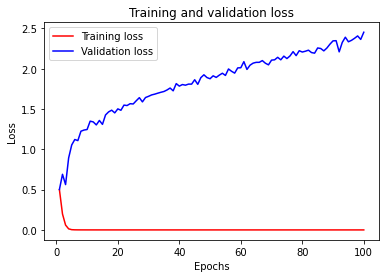

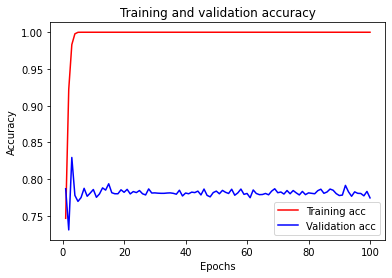

In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
acc_values = history.history['accuracy']
val_acc_values = history.history['val_accuracy']

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

模型准确率评估

In [46]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)
print('Test accuracy：', test_acc)

782/782 [==============================] - 2s 2ms/step - loss: 1.5704 - accuracy: 0.8440
Test accuracy： 0.843999981880188


In [0]:
predictions = model.predict(x_test)

执行预测

In [0]:
predictions = model.predict(x_test)

In [49]:
predictions[0]

array([0.9998282, 0.0001718], dtype=float32)

In [0]:
sentiment_dict = {0:'pos', 1:'neg'}

def display_test_sentiment(i):
    print(test_texts[i])
    print('label value:', sentiment_dict[np.argmax(y_test[i])],
        '\npredict value:', sentiment_dict[np.argmax(predictions[i])])

In [51]:
display_test_sentiment(0)

In 1968 when, "SYMBIOPSYCHOTAXIPLASM: Take One", was released, it came from out of nowhere, and struck like a psychedelic thunder bolt. Afro-American actor and film maker, William Greaves, aimed to forever alter the 'news-reel' style of documentary film-making, and to this day, there has never been anything quite like it. The movie is a film about 'the making of a film', and intentionally written and directed so as to create as much controversy and contradiction as possible. Set in New York's Central Park, the action and scant dialog concern a couple who fight and bicker about homosexuality and abortion. The woman wants out of the relationship, and the man wants an explanation. Near the end of this interaction, a drunk homeless man interrupts the proceedings and offers his commentary, and personal back-story. Then, after the principle footage has been shot, the film crew add their own views of the film-maker and what they feel is his inept handling of the movie. And during the entire f

星球大战 https://www.imdb.com/title/tt0080684/reviews

In [0]:
# 好评
review_text='''Star Wars Episode V - The Empire Strikes Back was released in 1980, three years after its overwhelmingly successful predecessor.
        To say The Empire Strikes Back does justice to A New Hope is a massive understatement as this film ups the ante in every way possible. Longer and better battles (such as the immaculate Battle of Hoth), a much darker and more mature plot with one of the most memorable (and quoted) twists of all time, AT-AT walkers, the introduction of Yoda are some of the reasons why Empire Strikes Back is the perfect sequel.
        Unlike A New Hope, this film was not directed by George Lucas but Irvin Kershner and to give credit where credit is due he did just as good of a job. Kershner also manages to get the best possible performances out of his cast, especially Hamill whose character changed drastically since the last film. We also see more of Vader and his deranged and almost animalistic character which is again perfectly displayed by James Earl Jones's vocals.
        Empire Strikes Back truly is the perfect sequel as it flourishes on George Lucas's elements as well as bringing in many more of its own in great succession.
        Final Grade - 9+/10
      '''

In [0]:
input_seq = token.texts_to_sequences([review_text])

In [0]:
pad_input_seq = tf.keras.preprocessing.sequence.pad_sequences(input_seq,
                                padding='post',
                                truncating='post',
                                maxlen=400)

In [0]:
pred = model.predict(pad_input_seq)

In [56]:
print('predict value:', sentiment_dict[np.argmax(pred)])

predict value: pos


函数封装

In [0]:
sentiment_dict = {0:'pos', 1:'neg'}

def display_text_sentiment(text):
    print(text)
    input_seq = token.texts_to_sequences([text])
    pad_input_seq = tf.keras.preprocessing.sequence.pad_sequences(input_seq,
                                  padding='post',
                                  truncating='post',
                                  maxlen=400)
    pred = model.predict(pad_input_seq)
    print('predict value:', sentiment_dict[np.argmax(pred)])

In [58]:
display_text_sentiment(review_text)

Star Wars Episode V - The Empire Strikes Back was released in 1980, three years after its overwhelmingly successful predecessor.
        To say The Empire Strikes Back does justice to A New Hope is a massive understatement as this film ups the ante in every way possible. Longer and better battles (such as the immaculate Battle of Hoth), a much darker and more mature plot with one of the most memorable (and quoted) twists of all time, AT-AT walkers, the introduction of Yoda are some of the reasons why Empire Strikes Back is the perfect sequel.
        Unlike A New Hope, this film was not directed by George Lucas but Irvin Kershner and to give credit where credit is due he did just as good of a job. Kershner also manages to get the best possible performances out of his cast, especially Hamill whose character changed drastically since the last film. We also see more of Vader and his deranged and almost animalistic character which is again perfectly displayed by James Earl Jones's vocals.


LSTM模型构建

In [0]:
model = tf.keras.models.Sequential()

In [0]:
model.add(tf.keras.layers.Embedding(output_dim=32,
                  input_dim=4000,
                  input_length=400))

In [0]:
# 用RNN，不用把词嵌入层平坦化
# 普通RNN用第三行替换，不同版本普通RNN差异比较大，较大概率得不到好结果
# model.add(tf.keras.layers.SimpleRNN(units=16))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=8)))# 展开8级

In [0]:
model.add(tf.keras.layers.Dense(units=32, activation='relu'))

In [0]:
model.add(tf.keras.layers.Dropout(0.3))

In [0]:
model.add(tf.keras.layers.Dense(units=2, activation='softmax'))

In [66]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 400, 32)           128000    
_________________________________________________________________
bidirectional (Bidirectional (None, 16)                2624      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 131,234
Trainable params: 131,234
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',
       loss='categorical_crossentropy',
       metrics=['accuracy'])

In [68]:
history = model.fit(x_train,
            y_train,
            validation_split=0.2,
            epochs=100,
            batch_size=128,
            verbose=1)

Epoch 1/100
157/157 [==============================] - 6s 40ms/step - loss: 0.5802 - accuracy: 0.6899 - val_loss: 0.6438 - val_accuracy: 0.7554
Epoch 2/100
157/157 [==============================] - 6s 38ms/step - loss: 0.3775 - accuracy: 0.8508 - val_loss: 0.7442 - val_accuracy: 0.6856
Epoch 3/100
157/157 [==============================] - 6s 37ms/step - loss: 0.3118 - accuracy: 0.8852 - val_loss: 0.4329 - val_accuracy: 0.8412
Epoch 4/100
157/157 [==============================] - 6s 40ms/step - loss: 0.2787 - accuracy: 0.8993 - val_loss: 0.4079 - val_accuracy: 0.8576
Epoch 5/100
157/157 [==============================] - 6s 37ms/step - loss: 0.2433 - accuracy: 0.9166 - val_loss: 0.4001 - val_accuracy: 0.8622
Epoch 6/100
157/157 [==============================] - 6s 37ms/step - loss: 0.2130 - accuracy: 0.9290 - val_loss: 0.5125 - val_accuracy: 0.8124
Epoch 7/100
157/157 [==============================] - 6s 37ms/step - loss: 0.1869 - accuracy: 0.9389 - val_loss: 0.5576 - val_accuracy:

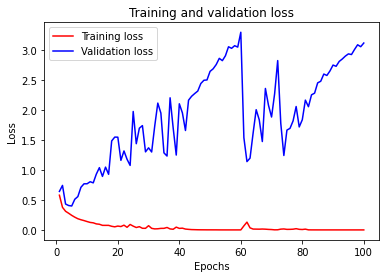

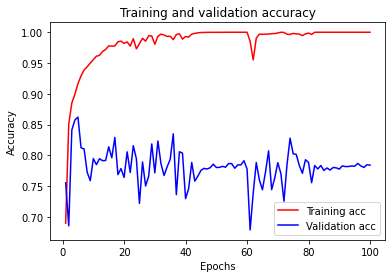

In [69]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
acc_values = history.history['accuracy']
val_acc_values = history.history['val_accuracy']

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()